In [12]:
morse_code = {
    'a': '.-',
    'b': '-...',
    'c': '-.-.',
    'd': '-..',
    'e': '.',
    'f': '..-.',
    'g': '--.',
    'h': '....',
    'i': '..',
    'j': '.---',
    'k': '-.-',
    'l': '.-..',
    'm': '--',
    'n': '-.',
    'o': '---',
    'p': '.--.',
    'q': '--.-',
    'r': '.-.',
    's': '...',
    't': '-',
    'u': '..-',
    'v': '...-',
    'w': '.--',
    'x': '-..-',
    'y': '-.--',
    'z': '--..',
    ' ': '/',
}

In [13]:
input_text = 'hello how are you' #input('Enter your text to convert into morse code : ')
text = input_text.lower()
morse_text = ''
for char in text:
    if char in morse_code:
        morse_text += morse_code[char] + ' '
print(morse_text)

.... . .-.. .-.. --- / .... --- .-- / .- .-. . / -.-- --- ..- 


In [14]:
input_code = '.... . .-.. .-.. --- / ...'#input('Enter your morse code to convert into text : ')
code = input_code.split()
text = ''
for char in code:
    for key, value in morse_code.items():
        if char == value:
            text += key
print(text)


hello s


In [15]:
# !pip install soundfile

import soundfile as sf

filename = '/content/A_through_Z_in_Morse_code.ogg' # Replace with your actual filename

try:
    # Read the ogg file
    data, samplerate = sf.read(filename)

    # You can now work with the audio data (e.g., analyze, plot)
    print(f"Successfully read '{filename}'.")
    print(f"Sample rate: {samplerate}")
    print(f"Number of samples: {len(data)}")

except FileNotFoundError:
    print(f"Error: File '{filename}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Successfully read '/content/A_through_Z_in_Morse_code.ogg'.
Sample rate: 44100
Number of samples: 1790180


<Axes: >

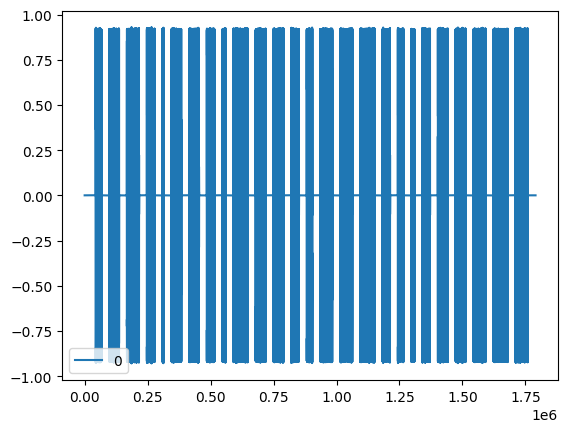

In [16]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data)
df.plot()

<Axes: >

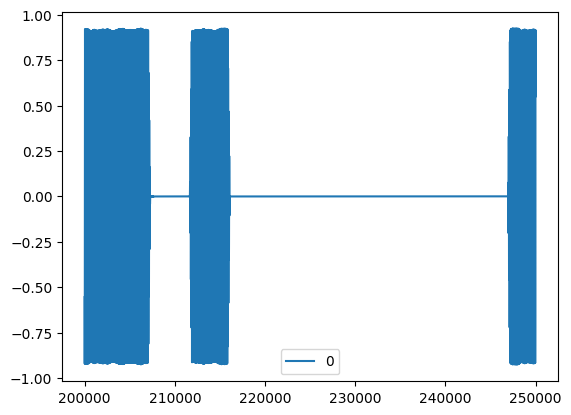

In [17]:
df[int(0.2e6):int(0.25e6)].plot()

In [18]:
import librosa.display
import IPython.display as ipd


<Axes: >

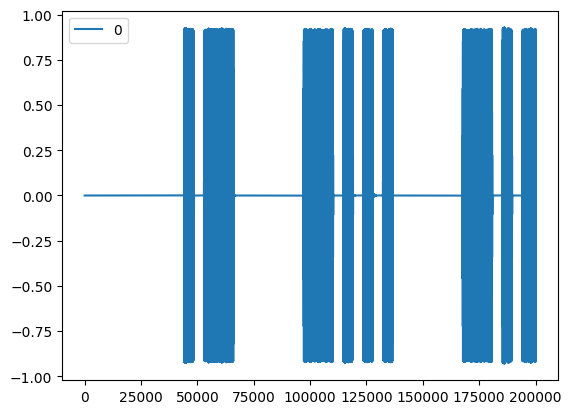

In [19]:
df[0:int(0.2e6)].plot()

In [22]:
df.value_counts()

,count
0,
0.000000,1012196
0.894016,17
0.742199,15
0.588105,14
0.912277,14
...,...
0.927187,1
0.927067,1
0.926971,1


In [23]:
# Select the first column and apply the function
df = df[0].apply(lambda x: 1 if x > 0 or x<0 else 0)

In [24]:
df.value_counts()

,count
0,
0,1012196
1,777984


<Axes: >

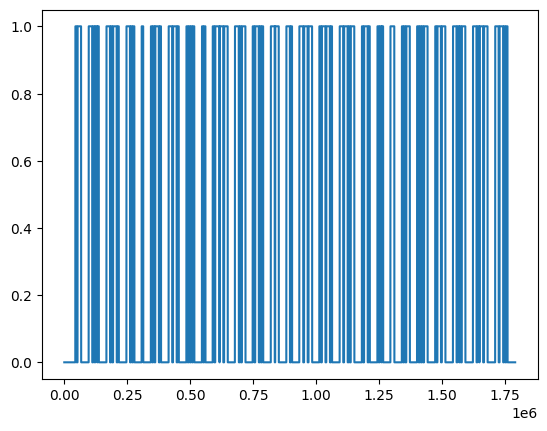

In [25]:
df.plot()

<Axes: >

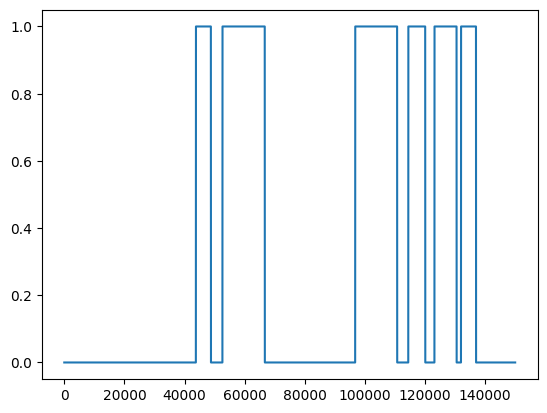

In [26]:
df[int(0):int(0.15e6)].plot()

In [27]:
# prompt: calculate zero threshold and one threshold

import numpy as np
# Find indices where the value changes from 0 to 1
zero_to_one_indices = df.index[(df == 1) & (df.shift(1) == 0)]

# Find indices where the value changes from 1 to 0
one_to_zero_indices = df.index[(df == 0) & (df.shift(1) == 1)]

print("Indices where value changes from 0 to 1:", zero_to_one_indices)
print("Indices where value changes from 1 to 0:", one_to_zero_indices)

# Calculate the duration of 1s and 0s
one_durations = [one_to_zero_indices[i] - zero_to_one_indices[i] for i in range(min(len(zero_to_one_indices), len(one_to_zero_indices)))]

# To get the durations of 0s, we need to consider the intervals between the ends of 1s and the beginnings of the next 1s.
# We can pair up the one_to_zero_indices and zero_to_one_indices for this.
zero_durations = []
for i in range(min(len(one_to_zero_indices), len(zero_to_one_indices) - 1)):
    zero_durations.append(zero_to_one_indices[i+1] - one_to_zero_indices[i])

# Handle the case where the data starts with 1
if df.iloc[0] == 1:
    # The first duration of 1 is from the start to the first 1->0 transition
    if len(one_to_zero_indices) > 0:
        one_durations.insert(0, one_to_zero_indices[0] - df.index[0])
    # The first duration of 0 starts after the first 1->0 transition
    if len(one_to_zero_indices) > 0 and len(zero_to_one_indices) > 0:
        zero_durations.insert(0, zero_to_one_indices[0] - one_to_zero_indices[0])


# Handle the case where the data ends with 0
if df.iloc[-1] == 0:
    # The last duration of 0 is from the last 1->0 transition to the end
    if len(one_to_zero_indices) > 0:
        zero_durations.append(df.index[-1] - one_to_zero_indices[-1])
    # The last duration of 1 ends at the last 1->0 transition
    if len(one_to_zero_indices) > 0 and len(zero_to_one_indices) > 0:
         pass # This case is handled by the list comprehension

# Handle the case where the data ends with 1
if df.iloc[-1] == 1:
     # The last duration of 1 is from the last 0->1 transition to the end
    if len(zero_to_one_indices) > 0:
        one_durations.append(df.index[-1] - zero_to_one_indices[-1])
     # The last duration of 0 ends at the last 0->1 transition
    if len(one_to_zero_indices) > 0 and len(zero_to_one_indices) > 0:
        pass # This case is handled by the list comprehension


print("Durations of 1s:", one_durations)
print("Durations of 0s:", zero_durations)

# Calculate thresholds
if one_durations:
    one_threshold = np.mean(one_durations)
    print(f"Average duration of 1s (one_threshold): {one_threshold}")
else:
    one_threshold = 0
    print("No durations of 1s found.")

if zero_durations:
    zero_threshold = np.mean(zero_durations)
    print(f"Average duration of 0s (zero_threshold): {zero_threshold}")
else:
    zero_threshold = 0
    print("No durations of 0s found.")


Indices where value changes from 0 to 1: Index([  43776,   52608,   96768,  114432,  123136,  131968,  167296,  184960,
        193792,  211328,  246656,  264320,  273152,  307008,  343680,  352512,
        361216,  378880,  414208,  431744,  449408,  484736,  493568,  502400,
        511104,  546432,  555264,  589120,  599296,  616960,  634624,  677312,
        696320,  705152,  747840,  758016,  775680,  784512,  819840,  837376,
        881536,  899200,  933056,  952064,  969728, 1012416, 1022592, 1040256,
       1057920, 1093248, 1110784, 1128448, 1137280, 1181440, 1190272, 1207808,
       1243136, 1251968, 1260800, 1294656, 1340160, 1348992, 1357824, 1400512,
       1410688, 1419520, 1428352, 1472512, 1481344, 1498880, 1543040, 1560576,
       1569408, 1578240, 1622400, 1639936, 1648768, 1666432, 1710592, 1728128,
       1745792, 1754624],
      dtype='int64')
Indices where value changes from 1 to 0: Index([  48768,   66688,  110720,  120064,  130496,  136960,  181376,  189952,
  

In [28]:
def compress_series(series, zero_threshold=zero_threshold, one_threshold=one_threshold):

  compressed_string = ''
  current_char = None
  current_count = 0

  for value in series:
    if value != current_char:
      if current_char is not None:
        if current_char == 0:
          compressed_string += ' / ' if current_count > zero_threshold else ''
        else: # current_char == 1
          compressed_string += '-' if current_count >= one_threshold else '.'
      current_char = value
      current_count = 1
    else:
      current_count += 1

  # Handle the last sequence
  if current_char is not None:
    if current_char == 0:
      compressed_string += ' / ' if current_count > zero_threshold else ''
    else: # current_char == 1
      compressed_string += '-' if current_count >= one_threshold else '.'

  return compressed_string

# Apply the function to your DataFrame column (assuming your data is in the first column)
# You might need to adjust the column index if your DataFrame has multiple columns
compressed_representation = compress_series(df)
compressed_representation


' / .- / -... / -.-. / -.. / . / ..-. / --. / .... / .. / .--- / -.- / .-.. / -- / -. / --- / .--. / --.- / .-. / ... / - / ..- / ...- / .-- / -..- / -.-- / --.. / '

In [29]:
input_code = compressed_representation
code = input_code.split()
text = ''
for char in code:
    for key, value in morse_code.items():
        if char == value:
            text += key
print(text)


 a b c d e f g h i j k l m n o p q r s t u v w x y z 
